**Task1 Credit Scoring Model**



*Description*

Develop a credit scoring model to predict the
creditworthiness of individuals based on historical
financial train_data. Utilize classification algorithms and
assess the model's accuracy.

Some Information about the data:

ID: Represents a unique identification of an entry

Customer_ID: Represents a unique identification of a person

Month: Represents the month of the year

Name: Represents the name of a person

Age: Represents the age of the person

SSN: Represents the social security number of a person

Occupation: Represents the occupation of the person

Annual_Income: Represents the annual income of the person

Monthly_Inhand_Salary: Represents the monthly base salary of a person

Num_Bank_Accounts: Represents the number of bank accounts a person holds

Num_Credit_Card: Represents the number of other credit cards held by a person

Interest_Rate: Represents the interest rate on credit card

Num_of_Loan: Represents the number of loans taken from the bank

Type_of_Loan: Represents the types of loan taken by a person

Delay_from_due_date: Represents the average number of days delayed from the payment date
Num_of_Delayed_Payment: Represents the average number of payments delayed by a person

Changed_Credit_Limit: Represents the percentage change in credit card limit

Num_Credit_Inquiries: Represents the number of credit card inquiries

Credit_Mix: Represents the classification of the mix of credits

Outstanding_Debt: Represents the remaining debt to be paid

Credit_Utilization_Ratio: Represents the utilization ratio of credit card

Credit_History_Age: Represents the age of credit history of the person

Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person

Total_EMI_per_month: Represents the monthly EMI payments

Amount_invested_monthly: Represents the monthly amount invested by the customer

Payment_Behaviour: Represents the payment behavior of the customer

Monthly_Balance:Represents the monthly balance amount of the customer

Credit_Score:Represents the bracket of credit score (Poor, Standard, Good) ((Target))


In [332]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,  PolynomialFeatures  
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier



In [333]:
train_data=pd.read_csv("../train.csv")
test_data=pd.read_csv("../test.csv")

C:\Users\AYA\AppData\Local\Temp\ipykernel_4472\3868841713.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data=pd.read_csv("../train.csv")


In [334]:
train_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [335]:
train_data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

**Pre processing**


In [336]:
train_data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [337]:
#Dropping null values
train_data.dropna(inplace=True)

In [338]:
train_data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [339]:
train_data["Credit_Mix"].value_counts()

Standard    19418
Good        11612
Bad         11326
_           10693
Name: Credit_Mix, dtype: int64

Find The outliers within the train_data

In [340]:

numericData = train_data.select_dtypes(include='number').columns

# Get the interquartile range by getting Q1 and Q3
Q1 = train_data[numericData].quantile(0.25)
Q3 = train_data[numericData].quantile(0.75)

IQR = Q3 - Q1

# Get whiskers to calculate the outliers
minimum = Q1 - (1.5 * IQR)
maximum = Q3 + (1.5 * IQR)



outliers = train_data[(train_data[numericData] < minimum) | (train_data[numericData] > maximum)]

print("The outliers are ")
print(outliers)

The outliers are 
        ID Customer_ID Month Name  Age  SSN Occupation Annual_Income  \
0      NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   
6      NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   
8      NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   
9      NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   
10     NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   
...    ...         ...   ...  ...  ...  ...        ...           ...   
99994  NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   
99995  NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   
99996  NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   
99997  NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   
99999  NaN         NaN   NaN  NaN  NaN  NaN        NaN           NaN   

       Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0                        NaN                NaN  

In [341]:
outliers.count()

ID                             0
Customer_ID                    0
Month                          0
Name                           0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       1299
Num_Bank_Accounts            670
Num_Credit_Card             1220
Interest_Rate               1136
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date         1733
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries         864
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       1
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month         3509
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

Fill the outliers train_data with Mean value of Numeric train_data

In [342]:

# Calculate the mean of each column
meanValue = train_data[numericData].mean()

# Convert outliers DataFrame to boolean
outliers_bool = outliers.notnull()

# Fill outliers with the mean
train_data[numericData] = train_data[numericData].mask(outliers_bool, meanValue, axis=0)

# Print the modified DataFrame
print(train_data)
print(meanValue)


            ID Customer_ID     Month             Name  Age          SSN  \
0       0x1602   CUS_0xd40   January    Aaron Maashoh   23  821-00-0265   
6       0x1608   CUS_0xd40      July    Aaron Maashoh   23  821-00-0265   
8       0x160e  CUS_0x21b1   January  Rick Rothackerj  28_  004-07-5839   
9       0x160f  CUS_0x21b1  February  Rick Rothackerj   28  004-07-5839   
10      0x1610  CUS_0x21b1     March  Rick Rothackerj   28  004-07-5839   
...        ...         ...       ...              ...  ...          ...   
99994  0x25fe8  CUS_0x942c     March            Nicks   25  078-73-5990   
99995  0x25fe9  CUS_0x942c     April            Nicks   25  078-73-5990   
99996  0x25fea  CUS_0x942c       May            Nicks   25  078-73-5990   
99997  0x25feb  CUS_0x942c      June            Nicks   25  078-73-5990   
99999  0x25fed  CUS_0x942c    August            Nicks   25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist  

**Visualization**

Pie Chart

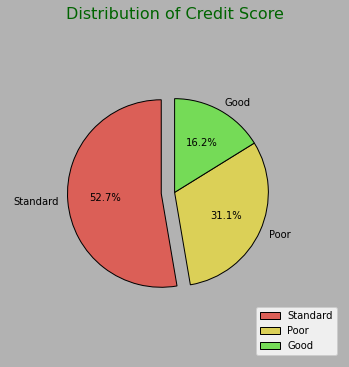

In [343]:
# Function to detail columns



# Plotting the data

fig, ax = plt.subplots(figsize=(6, 8))
fig.set_facecolor('#b2b2b2')
credit_score_names = ['Standard', 'Poor', 'Good']

ax.pie(
    train_data['Credit_Score'].value_counts(),
    labels=credit_score_names,
    radius=0.7,
    startangle=90,
    explode=(0.1, 0, 0),
    autopct='%1.1f%%',
    colors=sns.color_palette('hls', 7),
    wedgeprops={'edgecolor': 'k'}
)

# Customize the plot

plt.title('Distribution of Credit Score', color='darkgreen', fontsize=16)
plt.legend(loc='lower right', labels=credit_score_names, fontsize=10)


Count Plot

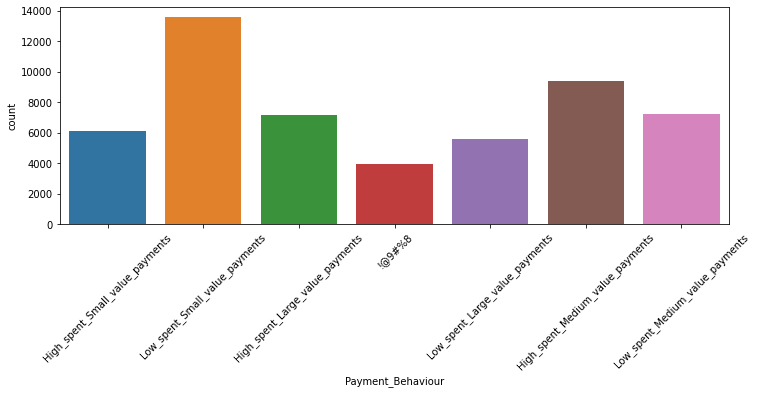

In [344]:
plt.figure(figsize=(12, 4))
sns.countplot(data=train_data,x=train_data['Payment_Behaviour'])
plt.xticks(rotation=45)
plt.show()

Histogram

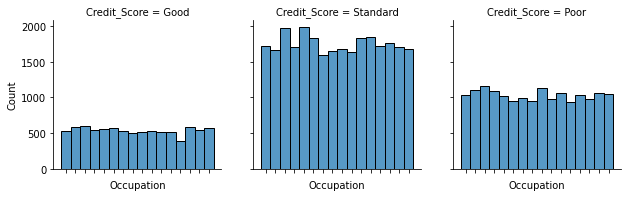

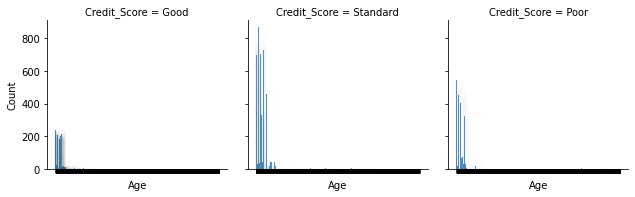

In [345]:
figure1 = sns.FacetGrid(train_data, col='Credit_Score', height=3, aspect=1)
figure1.map(sns.histplot, 'Occupation')
figure1.set(xticklabels=[])

figure2 = sns.FacetGrid(train_data, col='Credit_Score', height=3, aspect=1)
figure2.map(sns.histplot, 'Age')
figure2.set(xticklabels=[])

# Show the plots

plt.show()


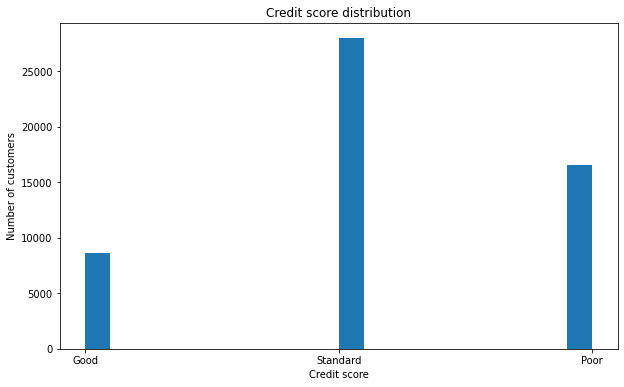

In [346]:
plt.figure(figsize=(10, 6))
plt.hist(train_data['Credit_Score'], bins=20)
plt.title('Credit score distribution')
plt.xlabel('Credit score')
plt.ylabel('Number of customers')
plt.show()

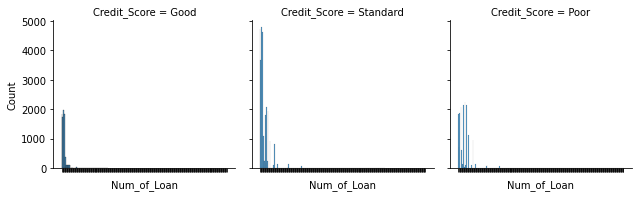

In [347]:
figure4 = sns.FacetGrid(train_data, col='Credit_Score')
figure4.map(sns.histplot, 'Num_of_Loan')
figure4.set(xticklabels=[])

Stripplot

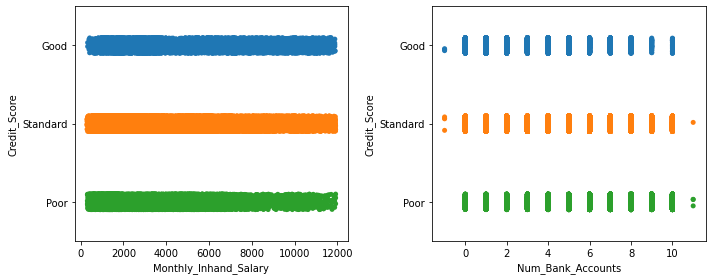

In [348]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plotting the data for the variables

sns.stripplot(
    data=train_data,
    x='Monthly_Inhand_Salary',
    y='Credit_Score',
    hue="Credit_Score",
    legend=False,
    ax=axes[0]
)

sns.stripplot(
    data=train_data,
    x='Num_Bank_Accounts',
    y='Credit_Score',
    hue="Credit_Score",
    legend=False,
    ax=axes[1]
)

plt.tight_layout()


plt.show()

Barplot

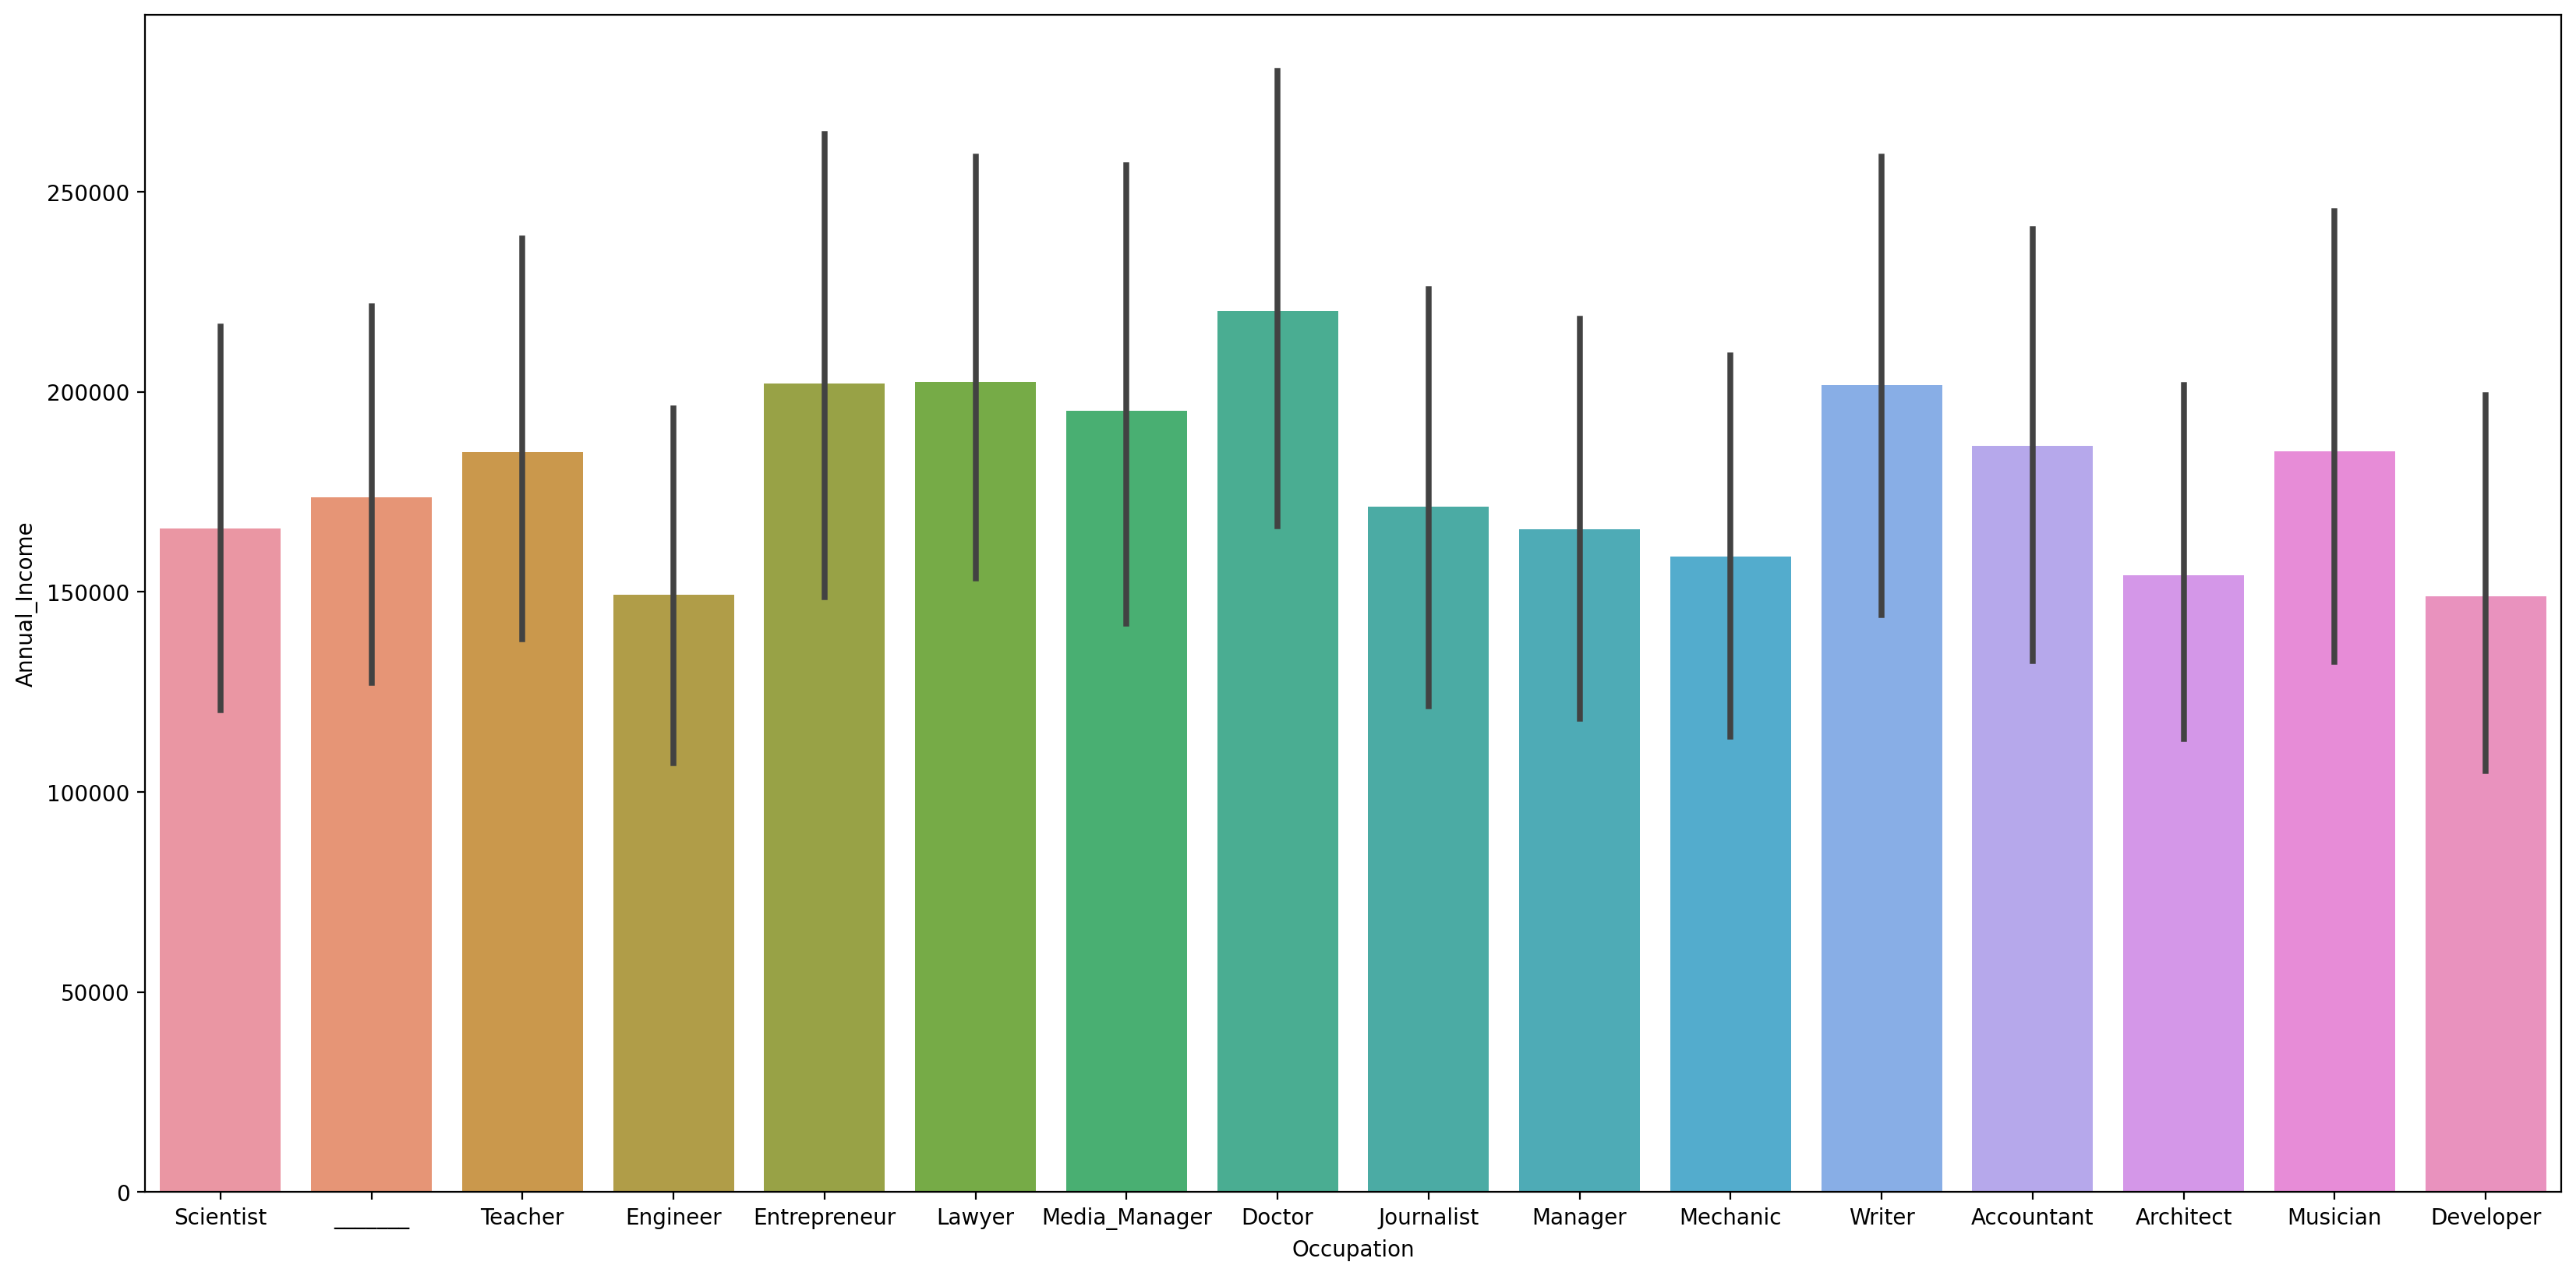

In [349]:

train_data['Annual_Income'] = pd.to_numeric(train_data['Annual_Income'], errors='coerce')
plt.figure(figsize=(20,10), dpi=200)
sns.barplot(data=train_data, x='Occupation', y= 'Annual_Income')
plt.show()

Box Plot

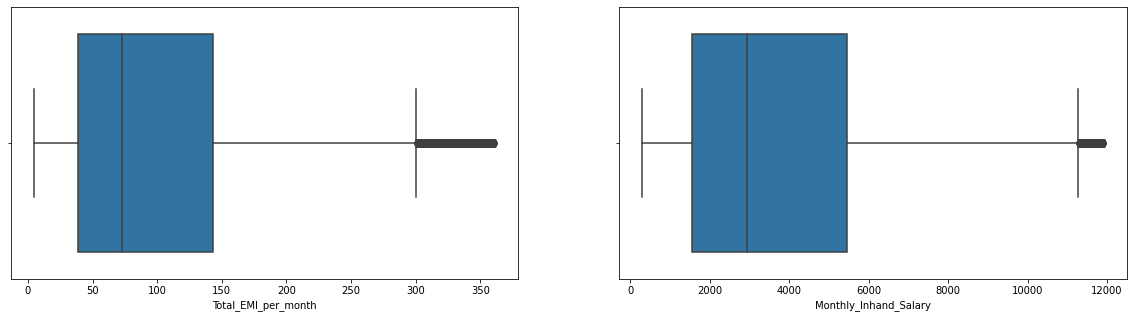

In [350]:
columns = {0:'Total_EMI_per_month' ,  1: 'Monthly_Inhand_Salary'}
fig, ax = plt.subplots(1,len(columns), figsize=(20, 5))
for key, val in columns.items(): 
    sns.boxplot(x=train_data[val], ax= ax[key])

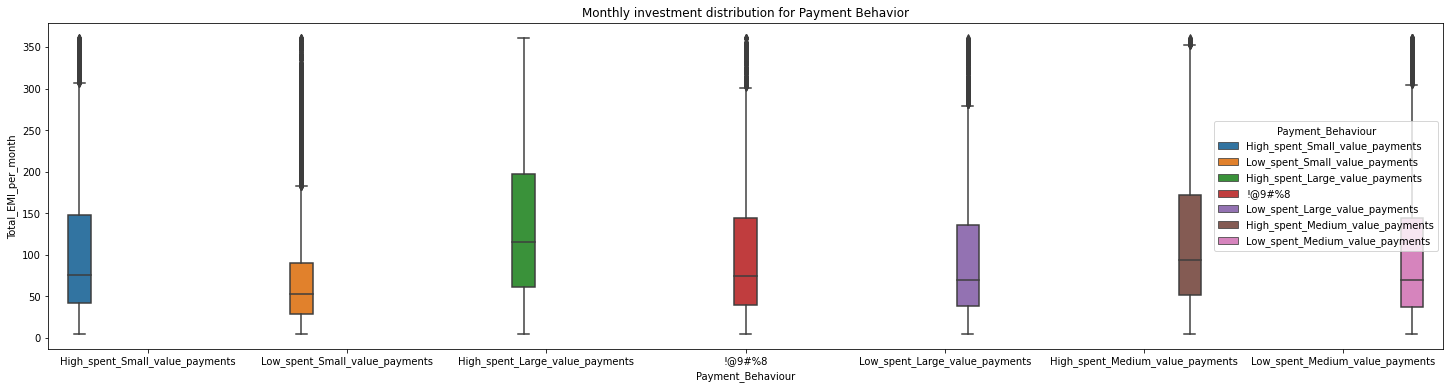

In [351]:
plt.figure(figsize=(25, 6))
sns.boxplot(x='Payment_Behaviour', y='Total_EMI_per_month', data=train_data, hue='Payment_Behaviour')
plt.title('Monthly investment distribution for Payment Behavior')
plt.show()

**Correlation heatmap**

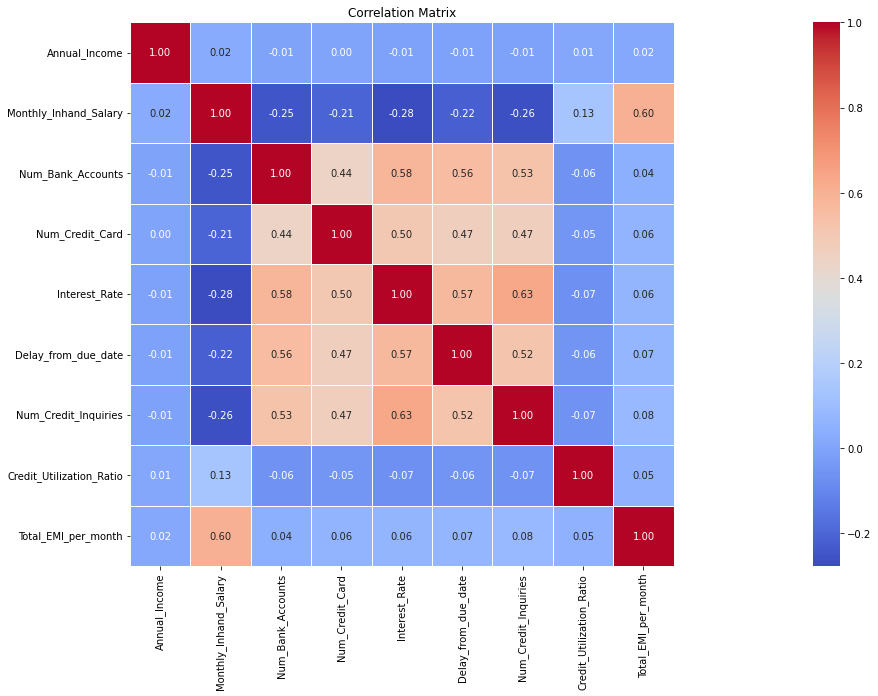

In [352]:
# check for correlation among the features

corr = train_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(50, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Dropping Unnecessary columns and highly correlated features

Encode Categorical to numeric

In [353]:
# Deleting (-) and (_) in Column
train_data['Changed_Credit_Limit'] = train_data['Changed_Credit_Limit'].str.replace('-','')
train_data['Changed_Credit_Limit'] = train_data['Changed_Credit_Limit'].str.replace('_','0') # the negative number here should indicate that the limit is zero, should be ignored

# Deleting (-) and (_) in Column
train_data['Outstanding_Debt'] = train_data['Outstanding_Debt'].str.replace('-','')
train_data['Outstanding_Debt'] = train_data['Outstanding_Debt'].str.replace('_','')

# Deleting (-) and (_) in Column
train_data['Monthly_Balance'] = train_data['Monthly_Balance'].str.replace('-','')
train_data['Monthly_Balance'] = train_data['Monthly_Balance'].str.replace('_','')

# Replace non-finite values with NaN
train_data['Delay_from_due_date'] = train_data['Delay_from_due_date'].replace(['NA', 'inf', '-inf'], np.nan)

# Convert the column to float
train_data['Delay_from_due_date'] = train_data['Delay_from_due_date'].astype(float)

# Convert the column to integer
train_data['Delay_from_due_date'] = train_data['Delay_from_due_date'].fillna(0).astype(int)

train_data['Delay_from_due_date']=train_data['Delay_from_due_date'].astype(int)
train_data['Delay_from_due_date']=train_data['Delay_from_due_date'].replace('-','')
# Deleting (-) and (_) in Column

train_data['Num_of_Delayed_Payment'] = train_data['Num_of_Delayed_Payment'].str.replace('-','')
train_data['Num_of_Delayed_Payment'] = train_data['Num_of_Delayed_Payment'].str.replace('_','')

train_data['Amount_invested_monthly'] = train_data['Amount_invested_monthly'].str.replace('-','')
train_data['Amount_invested_monthly'] = train_data['Amount_invested_monthly'].str.replace('_','')


train_data['Credit_Mix'] = train_data['Amount_invested_monthly'].str.replace('-','')
train_data['Credit_Mix'] = train_data['Amount_invested_monthly'].str.replace('_','')

train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].str.replace('!@9#%8','Unknown') #remove the error values by unknown behavior
train_data['Occupation']=train_data['Occupation'].str.replace('_______','unknown')

# Deleting (-) and (_) in Column
train_data['Age'] = train_data['Age'].str.replace('-','')
train_data['Age'] = train_data['Age'].str.replace('_','')

train_data['Annual_Income'] = train_data['Annual_Income'].astype(str)
train_data['Annual_Income'] = train_data['Annual_Income'].str.replace('-','')
train_data['Annual_Income'] = train_data['Annual_Income'].str.replace('_','')

# Deleting (-) and (_) in Column
train_data['Num_of_Loan'] = train_data['Num_of_Loan'].str.replace('-','')
train_data['Num_of_Loan'] = train_data['Num_of_Loan'].str.replace('_','')


Check datatypes of data

In [354]:
train_data['Age'] = train_data['Age'].astype(int)
train_data['Annual_Income'] = train_data['Annual_Income'].astype(float)
train_data['Num_of_Loan'] = train_data['Num_of_Loan'].astype(int)
train_data['Changed_Credit_Limit'] = train_data['Changed_Credit_Limit'].astype(float)
train_data['Outstanding_Debt'] = train_data['Outstanding_Debt'].astype(float)
train_data['Monthly_Balance'] = train_data['Monthly_Balance'].astype(float)
train_data['Num_of_Delayed_Payment'] = train_data['Num_of_Delayed_Payment'].astype(float)
train_data['Amount_invested_monthly'] = train_data['Amount_invested_monthly'].astype(float)
train_data['Credit_History_Age'] = train_data['Credit_History_Age'].astype(str)
train_data['Credit_Mix'] = train_data['Credit_Mix'].astype(str)

Handling missing values

In [355]:
train_data['Monthly_Inhand_Salary'] = train_data.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.fillna(x.mean()))
train_data['Num_of_Delayed_Payment'] = train_data.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.fillna(x.mean()))
train_data['Credit_History_Age'] = train_data.groupby('Customer_ID')['Credit_History_Age'].transform(lambda x: x.fillna(x.mode().iloc[0]))  # Using iloc[0] to get the first mode if multiple modes exist
train_data['Credit_Mix'] = train_data.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.fillna(x.mode().iloc[0]))

train_data['Amount_invested_monthly'] = train_data.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.fillna(x.mean()))
train_data = train_data.dropna(subset=['Monthly_Balance','Num_Credit_Inquiries','Monthly_Inhand_Salary']) 


In [356]:
print (train_data)

            ID Customer_ID     Month             Name  Age          SSN  \
0       0x1602   CUS_0xd40   January    Aaron Maashoh   23  821-00-0265   
6       0x1608   CUS_0xd40      July    Aaron Maashoh   23  821-00-0265   
8       0x160e  CUS_0x21b1   January  Rick Rothackerj   28  004-07-5839   
9       0x160f  CUS_0x21b1  February  Rick Rothackerj   28  004-07-5839   
10      0x1610  CUS_0x21b1     March  Rick Rothackerj   28  004-07-5839   
...        ...         ...       ...              ...  ...          ...   
98296  0x255f6  CUS_0x9d41   January       Rothackerz   38  979-38-2855   
98298  0x255f8  CUS_0x9d41     March       Rothackerz   38  979-38-2855   
98299  0x255f9  CUS_0x9d41     April       Rothackerz   38  979-38-2855   
98300  0x255fa  CUS_0x9d41       May       Rothackerz   38  979-38-2855   
98303  0x255fd  CUS_0x9d41    August       Rothackerz   38  979-38-2855   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist      

In [357]:
train_data.dropna()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,80.41529543900253,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,178.3440674122349,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,unknown,34847.84,3037.986667,2.0,...,104.291825168246,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2.0,...,40.39123782853101,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
12,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2.0,...,130.11542024292334,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98280,0x255de,CUS_0xb80d,January,Alex Frewt,31,713-24-3856,Developer,28796.82,2378.735000,6.0,...,226.65527284680897,2382.35,35.168085,5 Years and 11 Months,Yes,82.235220,226.655273,Low_spent_Medium_value_payments,208.983007,Poor
98285,0x255e3,CUS_0xb80d,June,Alex Frewt,32,713-24-3856,Developer,28796.82,2378.735000,6.0,...,59.38608025863144,2382.35,25.562788,6 Years and 4 Months,Yes,82.235220,59.386080,High_spent_Large_value_payments,336.252200,Standard
98298,0x255f8,CUS_0x9d41,March,Rothackerz,38,979-38-2855,Lawyer,41015.55,3152.962500,0.0,...,10000,599.40,30.760830,25 Years and 1 Months,No,25.671257,10000.000000,Low_spent_Small_value_payments,178.327142,Standard
98299,0x255f9,CUS_0x9d41,April,Rothackerz,38,979-38-2855,Lawyer,41015.55,3152.962500,0.0,...,387.5414392986354,599.40,31.936092,25 Years and 2 Months,NM,25.671257,387.541439,Low_spent_Small_value_payments,192.083554,Standard


This approach is for filling missing values with the mean for numerical columns and the mode for categorical columns.

In [358]:
def model_performance(y_test,y_pred, method):
    
    # calculate the accruacy of the model
    print("Accuracy score of the model", accuracy_score(y_test,y_pred))
    print("Classification report \n")
    
    #generate the classification report
    print(classification_report(y_test,y_pred))
    
    #generate the confusion matrix
    fig = plt.figure(figsize = (4,4))
    ax = fig.gca()
    cnf_matrix_log = confusion_matrix(y_test, y_pred)
    sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix: '+  method + '\n', y=1.1)

Encode Categorical data 

In [359]:
train_data['Credit_Mix'] = train_data['Credit_Mix'].str.replace('Bad','0')
train_data['Credit_Mix'] = train_data['Credit_Mix'].str.replace('Standard','1')
train_data['Credit_Mix'] = train_data['Credit_Mix'].str.replace('Good','2')
train_data['Credit_Mix'] = train_data['Credit_Mix'].astype(float)


train_data['Credit_Score'] = train_data['Credit_Score'].str.replace('Poor','0')
train_data['Credit_Score'] = train_data['Credit_Score'].str.replace('Standard','1')
train_data['Credit_Score'] = train_data['Credit_Score'].str.replace('Good','2')
train_data['Credit_Score'] = train_data['Credit_Score'].astype(int)

train_data['Payment_of_Min_Amount']=train_data['Payment_of_Min_Amount'].str.replace('Yes','1')
train_data['Payment_of_Min_Amount']=train_data['Payment_of_Min_Amount'].str.replace('NM','0')
train_data['Payment_of_Min_Amount']=train_data['Payment_of_Min_Amount'].str.replace('No','0')
train_data['Payment_of_Min_Amount'] = train_data['Payment_of_Min_Amount'].astype(int)


train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].str.replace('Unknown','0')
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].str.replace('Low_spent_Small_value_payments','1')
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].str.replace('Low_spent_Medium_value_payments','2')
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].str.replace('Low_spent_Large_value_payments','3')
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].str.replace('High_spent_Small_value_payments','4')
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].str.replace('High_spent_Medium_value_payments','5')
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].str.replace('High_spent_Large_value_payments','6')
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].astype(int)

C:\Users\AYA\AppData\Local\Temp\ipykernel_4472\2993021316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Credit_Mix'] = train_data['Credit_Mix'].str.replace('Bad','0')
C:\Users\AYA\AppData\Local\Temp\ipykernel_4472\2993021316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Credit_Mix'] = train_data['Credit_Mix'].str.replace('Standard','1')
C:\Users\AYA\AppData\Local\Temp\ipykernel_4472\2993021316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [360]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Convert 'Type_of_Loan' column to string
train_data['Type_of_Loan'] = train_data['Type_of_Loan'].astype(str)

# Use LabelEncoder to encode the 'Type_of_Loan' column
le = LabelEncoder()
train_data['Type_of_Loan'] = le.fit_transform(train_data['Type_of_Loan'])

C:\Users\AYA\AppData\Local\Temp\ipykernel_4472\1663806623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Type_of_Loan'] = train_data['Type_of_Loan'].astype(str)
C:\Users\AYA\AppData\Local\Temp\ipykernel_4472\1663806623.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Type_of_Loan'] = le.fit_transform(train_data['Type_of_Loan'])


In [361]:
import re
def extract_year(duration):
    match = re.search(r'(\d+) Years', duration)
    if match:
        return int(match.group(1))
    else:
        return None
train_data['Credit_History_Age'] = train_data['Credit_History_Age'].apply(extract_year)

C:\Users\AYA\AppData\Local\Temp\ipykernel_4472\3420486655.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Credit_History_Age'] = train_data['Credit_History_Age'].apply(extract_year)


Dropping Unnecessary columns aand highly correlated features

C:\Users\AYA\AppData\Local\Temp\ipykernel_4472\2926484038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(["ID", "Customer_ID", "Name", "SSN", "Month", "Type_of_Loan","Occupation","Interest_Rate"], axis=1, inplace=True)


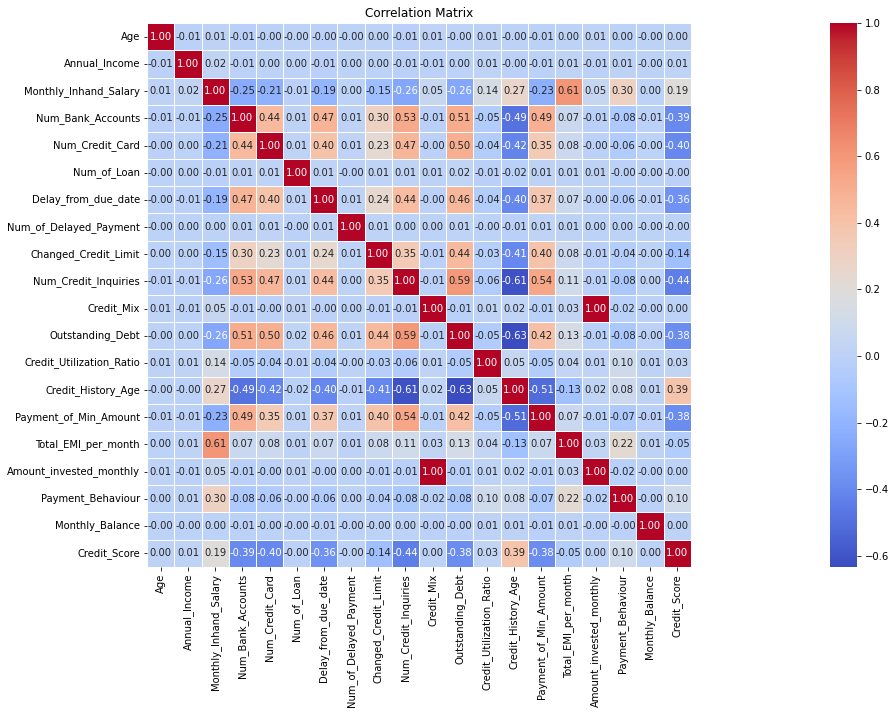

In [362]:
train_data.drop(["ID", "Customer_ID", "Name", "SSN", "Month", "Type_of_Loan","Occupation","Interest_Rate"], axis=1, inplace=True)
train_data.duplicated().any()

corr2 = train_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(50, 10))
sns.heatmap(corr2, annot=True, cmap='coolwarm',square=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [363]:
train_data = train_data.fillna(0)

In [364]:
X=train_data.drop(columns=['Credit_Score'])
Y=train_data['Credit_Score']

In [365]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**1- Random Forest**


In [366]:

model_rf = RandomForestClassifier(n_estimators=500 , n_jobs = -1,random_state =50,max_leaf_nodes = 30, criterion = 'entropy',min_samples_leaf=2)
# fitting the model
import numpy as np

# Replace non-convertible values with NaN
train_data['Monthly_Balance'] = pd.to_numeric(train_data['Monthly_Balance'], errors='coerce')

# Fill NaN values with the mean of the column
mean_value = train_data['Monthly_Balance'].mean()
train_data['Monthly_Balance'].fillna(mean_value, inplace=True)



# Now, you can use X_train_imputed and X_test_imputed in your RandomForestClassifier
model_rf.fit(x_train, y_train)


# make predictions
prediction_test = model_rf.predict(x_test)


Accuracy score of the model 0.6760263490584869
Classification report 

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      4794
           1       0.67      0.79      0.72      7881
           2       0.61      0.32      0.42      2354

    accuracy                           0.68     15029
   macro avg       0.66      0.59      0.61     15029
weighted avg       0.67      0.68      0.66     15029



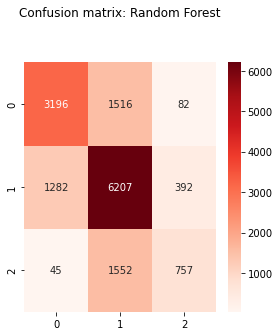

In [367]:
model_performance(y_test,prediction_test, 'Random Forest')

2- Logistic Regression

Accuracy score of the model 0.318983298955353
Classification report 

              precision    recall  f1-score   support

           0       0.32      1.00      0.48      4794
           1       0.00      0.00      0.00      7881
           2       0.00      0.00      0.00      2354

    accuracy                           0.32     15029
   macro avg       0.11      0.33      0.16     15029
weighted avg       0.10      0.32      0.15     15029



c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarn

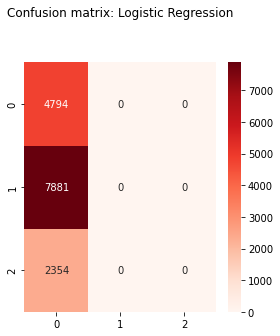

In [368]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model_performance(y_test,y_pred,"Logistic Regression")

3- KNN

In [369]:
knn = KNeighborsClassifier()

parameters = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],  # Example values, you can choose others
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 is manhattan_distance and 2 is euclidean_distance
}

In [370]:
grid_search = GridSearchCV(estimator=knn, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


In [371]:
best_knn = grid_search.best_estimator_

y_pred2 = best_knn.predict(x_test)

Accuracy score of the model 0.6935923880497704
Classification report 

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      4794
           1       0.70      0.76      0.73      7881
           2       0.62      0.46      0.53      2354

    accuracy                           0.69     15029
   macro avg       0.68      0.64      0.65     15029
weighted avg       0.69      0.69      0.69     15029



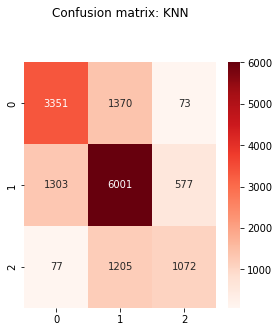

In [372]:
model_performance(y_test,y_pred2,"KNN")

4- Multilayer Perceptron

In [373]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
}

In [374]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(x_train, y_train)

print('Best parameters found:\n', clf.best_params_)

c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\si

Best parameters found:
 {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'adam'}


Accuracy score of the model 0.5288442344800053
Classification report 

              precision    recall  f1-score   support

           0       0.60      0.04      0.07      4794
           1       0.53      0.98      0.69      7881
           2       0.20      0.00      0.00      2354

    accuracy                           0.53     15029
   macro avg       0.44      0.34      0.25     15029
weighted avg       0.50      0.53      0.38     15029



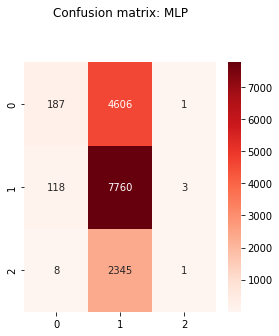

In [375]:
final_mlp = MLPClassifier(max_iter=100, **clf.best_params_)

# Drop rows with missing values from the training and test sets
# X_train_dropped = X_train.dropna()
# y_train_dropped = y_train[X_train.index.intersection(X_train_dropped.index)]

# X_test_dropped = X_test.dropna()
# y_test_dropped = y_test[X_test.index.intersection(X_test_dropped.index)]

# Now, you can use X_train_dropped, y_train_dropped, X_test_dropped, and y_test_dropped 
final_mlp.fit(x_train, y_train)
y_pred4= final_mlp.predict(x_test)
model_performance(y_test, y_pred4, "MLP")